In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.tsa import stattools, ar_model
from statsmodels.tsa.arima_model import ARMA

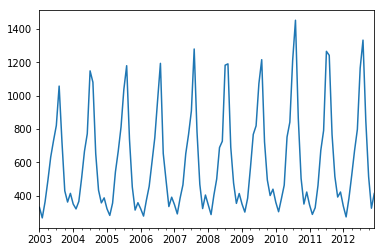

In [2]:
df_ice = pd.read_csv('C:/home/myproj/study_ml/ap_timeseries/chap1/icecream.csv')
y = pd.Series(df_ice.icecream.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [3]:
ctt = stattools.adfuller(y[:100], regression="ctt")
ct = stattools.adfuller(y[:100], regression="ct")
c = stattools.adfuller(y[:100], regression="c")
nc = stattools.adfuller(y[:100], regression="nc")

print("ctt", ctt[1])
print("ct", ct[1])
print("c", c[1])
print("nc", nc[1])


ctt 0.1692244861968732
ct 0.7444294601457631
c 0.8583259363632654
nc 0.9751761218376868


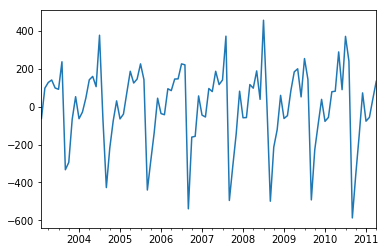

In [4]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [5]:
ctt = stattools.adfuller(y_diff[:100], regression="ctt")
ct = stattools.adfuller(y_diff[:100], regression="ct")
c = stattools.adfuller(y_diff[:100], regression="c")
nc = stattools.adfuller(y_diff[:100], regression="nc")

print("ctt", ctt[1])
print("ct", ct[1])
print("c", c[1])
print("nc", nc[1])


ctt 0.0
ct 0.0
c 0.0
nc 0.0


In [8]:
info_criteria = stattools.arma_order_select_ic(y_diff, ic = ['aic', 'bic'])
info_criteria.aic_min_order, info_criteria.bic_min_order

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


((4, 2), (4, 2))

In [10]:
model  = ARMA(y_diff, (4,2))
results = model.fit()

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<BarContainer object of 99 artists>

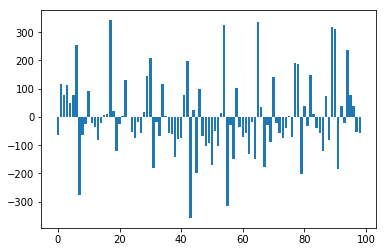

In [14]:
#残差の確認
res = results.resid
plt.bar(range(len(res)), res)

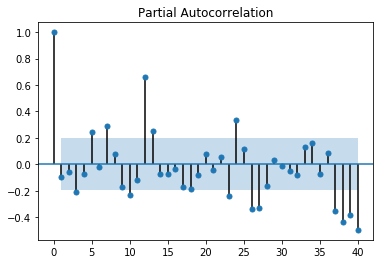

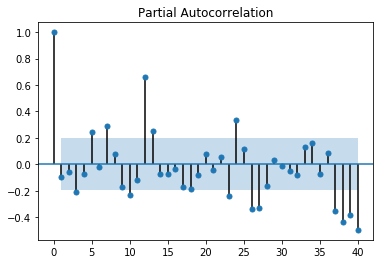

In [15]:
from statsmodels.graphics import tsaplots
tsaplots.plot_pacf(res, lags=40)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


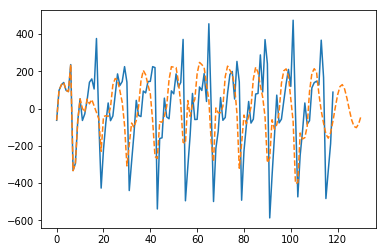

In [17]:
plt.plot(y.diff().dropna().values, label="observation")
plt.plot(np.hstack([y_diff[:11], results.fittedvalues, results.predict(98-11, 107, dynamic =True)]), '--', label="forcast")